In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub

didiersalazar_lab2_dataset_path = kagglehub.dataset_download('didiersalazar/lab2-dataset')
didiersalazar_pictures_path = kagglehub.dataset_download('didiersalazar/pictures')
didiersalazar_google_news_vectors_path = kagglehub.dataset_download('didiersalazar/google-news-vectors')

print('Data source import complete.')

Data source import complete.


In [2]:
!pip3 install scikit-learn --upgrade
!pip3 install pandas --upgrade
!pip3 install numpy --upgrade
!pip3 install matplotlib --upgrade
!pip3 install plotly --upgrade
!pip3 install seaborn --upgrade
!pip3 install nltk --upgrade
!pip3 install umap-learn --upgrade

!pip3 install gensim --upgrade
#!pip3 install tensorflow --upgrade
!pip3 install tensorflow==2.17.0
!pip3 install keras --upgrade

!pip3 install ollama --upgrade
!pip3 install langchain --upgrade
!pip3 install langchain_community --upgrade
!pip3 install langchain_core --upgrade
!pip3 install beautifulsoup4 --upgrade
!pip3 install chromadb --upgrade
!pip3 install gradio --upgrade

  Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
langchain 0.3.9 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.1.3 which is incompatible.
langchain-community 0.3.9 requires numpy<2,>=1.22.4; python_version < "3.12

In [3]:
#Download ollama
!curl -fsSL https://ollama.com/install.sh | sh
import subprocess
process = subprocess.Popen("ollama serve", shell=True) #runs on a different thread

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [4]:
#Download model llama 3.2:1b
!ollama pull llama3.2:1b

Error: could not connect to ollama app, is it running?


In [5]:
#Download model llama 3.2
!ollama pull llama3.2

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest 
pulling dde5aa3fc5ff... 100% ▕▏ 2.0 GB                         
pulling 966de95ca8a6... 100% ▕▏ 1.4 KB                         
pulling fcc5a6bec9da... 100% ▕▏ 7.7 KB                         
pulling a70ff7e570d9... 100% ▕▏ 6.0 KB                         
pulling 56bb8bd477a5... 100% ▕▏   96 B                         
pulling 34bb5ab01051... 100% ▕▏  561 B                         
verifying sha256 digest 
writing manifest 
success 


In [6]:
#Download model llava-phi3
!ollama pull llava-phi3

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠸ pulling manifest ⠸ pulling manifest 
pulling 377876be20ba... 100% ▕▏ 2.3 GB                         
pulling 004fc0969720... 100% ▕▏ 607 MB                         
pulling c608dc615584... 100% ▕▏  149 B                         
pulling cadf483f03b5... 100% ▕▏  155 B                         
pulling 3921dac664c1... 100% ▕▏  492 B                         
verifying sha256 digest 
writing manifest 
success 


In [7]:
# import library
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import umap
import gensim
import tensorflow
import keras
import ollama
import langchain
import langchain_community
import langchain_core
import bs4
import chromadb
import gradio

%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.3.3
tensorflow: 2.17.0
keras: 3.7.0


# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic0.png?raw=true)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [8]:
import pandas as pd

### training data
anger_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [9]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [10]:
### testing data
anger_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [11]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [12]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### **>>> Exercise 1 (Take home):**   
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


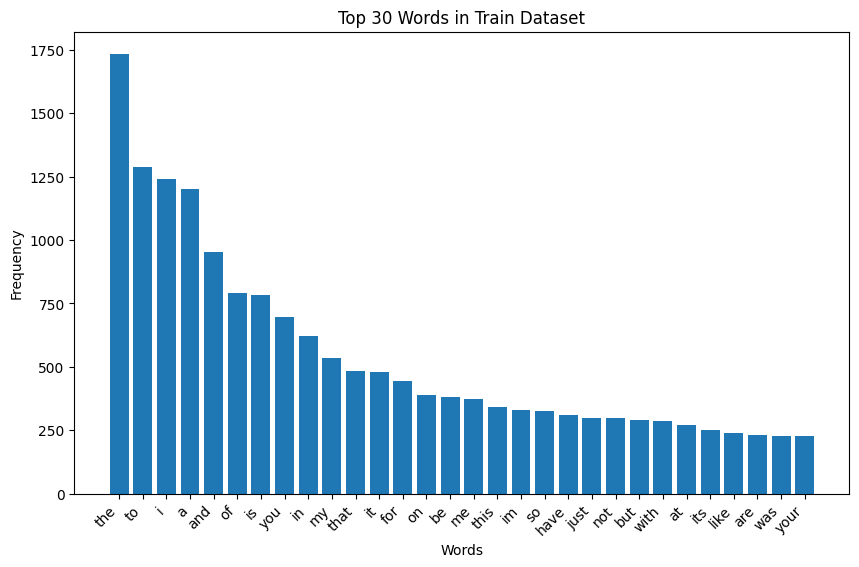

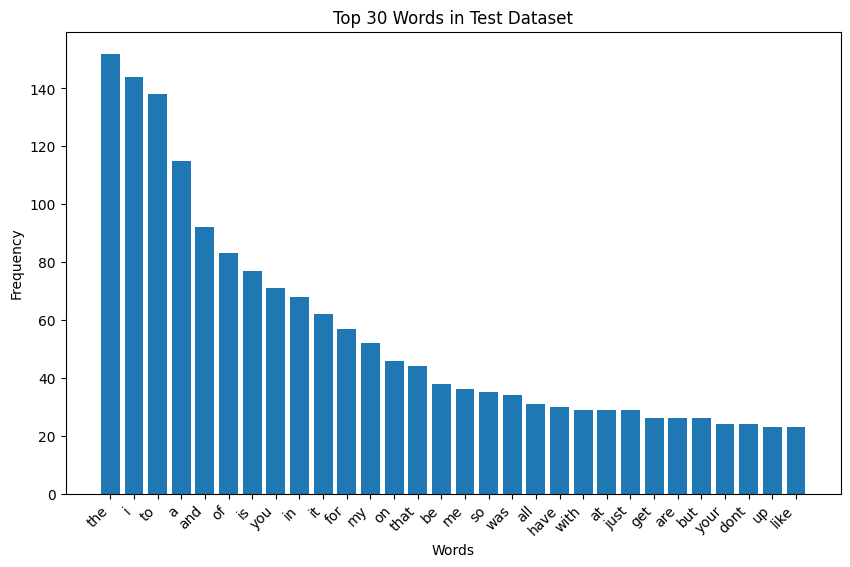

In [13]:
# Answer here
import matplotlib.pyplot as plt
from collections import Counter
import re

# Function to clean and tokenize text
def tokenize(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    tokens = text.split()  # Split into words
    return tokens

# Combine all text data for train and test datasets
train_text = " ".join(train_df["text"])
test_text = " ".join(test_df["text"])

# Tokenize the text
train_tokens = tokenize(train_text)
test_tokens = tokenize(test_text)

# Count word frequencies
train_word_freq = Counter(train_tokens)
test_word_freq = Counter(test_tokens)

# Get the Top 30 words
train_top30 = train_word_freq.most_common(30)
test_top30 = test_word_freq.most_common(30)

# Plot word frequency
def plot_word_frequency(word_freq, title):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

plot_word_frequency(train_top30, "Top 30 Words in Train Dataset")
plot_word_frequency(test_top30, "Top 30 Words in Test Dataset")

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [13]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [14]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [15]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


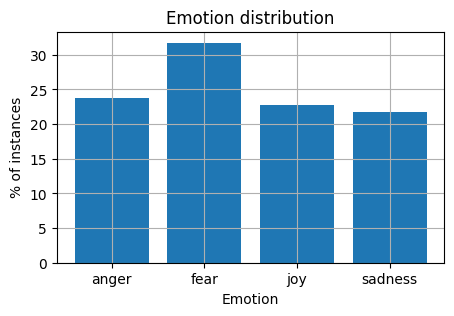

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [19]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [20]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [21]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [22]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [24]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[1000:1010]

array(['beck', 'beckett', 'become', 'becoming', 'becouse', 'becz', 'bed',
       'beds', 'bedtime', 'bee'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emotions yield better performance than counterparts)

In [25]:
"😂" in feature_names

False

In [26]:
"love" in feature_names

True

Let's try using another tokenizer below.

In [27]:
import nltk
nltk.download('punkt_tab')
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [28]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1]])

In [29]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'come',
       'comes', 'could', 'country', 'cry'], dtype=object)

In [30]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [32]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
# import nltk

# Ensure NLTK tokenizer is available
# nltk.download('punkt')

# Build TF-IDF Vectorizer with a max of 1000 features
tfidf_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# Fit the vectorizer on the training data and transform both train and test data
tfidf_vectorizer.fit(train_df['text'])
train_data_tfidf_features = tfidf_vectorizer.transform(train_df['text'])
test_data_tfidf_features = tfidf_vectorizer.transform(test_df['text'])

# Check dimensions of the transformed data
print("Train Data Shape (TF-IDF Features):", train_data_tfidf_features.shape)
print("Test Data Shape (TF-IDF Features):", test_data_tfidf_features.shape)

# Get feature names
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

# Display feature names from index 100 to 110
print("Feature Names [100:110]:", feature_names_tfidf[100:110])

Train Data Shape (TF-IDF Features): (3613, 1000)
Test Data Shape (TF-IDF Features): (347, 1000)
Feature Names [100:110]: ['attacks' 'awareness' 'away' 'awe' 'awesome' 'awful' 'b' 'baby' 'back'
 'bad']


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [32]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'anger', 'anger', 'joy', 'fear', 'anger', 'anger',
       'sadness', 'anger', 'anger'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [33]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [34]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.62      0.71      0.67        84
        fear       0.67      0.63      0.65       110
         joy       0.74      0.67      0.70        79
     sadness       0.62      0.64      0.63        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [35]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[60 11  7  6]
 [20 69  7 14]
 [ 6 11 53  9]
 [10 12  5 47]]


In [36]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

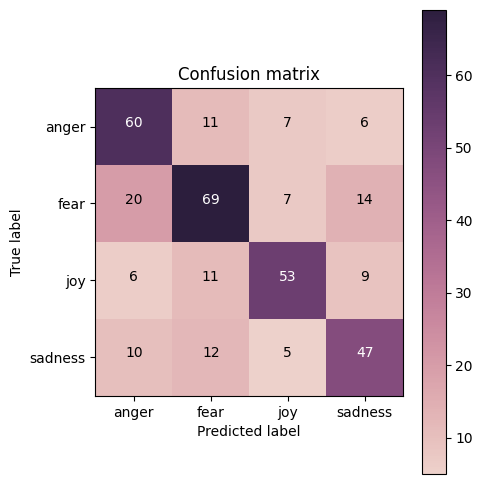

In [37]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

1.   **Overview of the Confusion Matrix**

*   Rows represent the **actual (true) labels** of the dataset (anger, fear, joy, sadness).
*   Columns represent the **predicted labels** made by the model.
*   Each cell in the matrix indicates how many instances of a particular true label were classified into each predicted label.


2.   **Overall Observations**: The model performs reasonably well but shows room for improvement

*   “Fear” is predicted most accurately, with **76 correct predictions** out of 110 instances.
*   “Joy” and “Sadness” are also reasonably well-predicted but have some overlap with other emotions.
*   “Anger” is misclassified as “fear” relatively often (18 times), indicating the model struggles to distinguish between these emotions.


3.   **Key Metrics**

*   Anger: Overall accuracy is **68%**, meaning 68% of predictions across all classes are correct.
*   Precision, Recall, F1-Score: Scores are consistent across all emotions, ranging between **0.66-0.72**, indicating balanced performance but leaving room for improvement.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Testing Accuracy (Naive Bayes): 0.71

Classification Report (Naive Bayes):

              precision    recall  f1-score   support

       anger       0.65      0.67      0.66        84
        fear       0.74      0.81      0.77       110
         joy       0.77      0.70      0.73        79
     sadness       0.66      0.62      0.64        74

    accuracy                           0.71       347
   macro avg       0.71      0.70      0.70       347
weighted avg       0.71      0.71      0.71       347



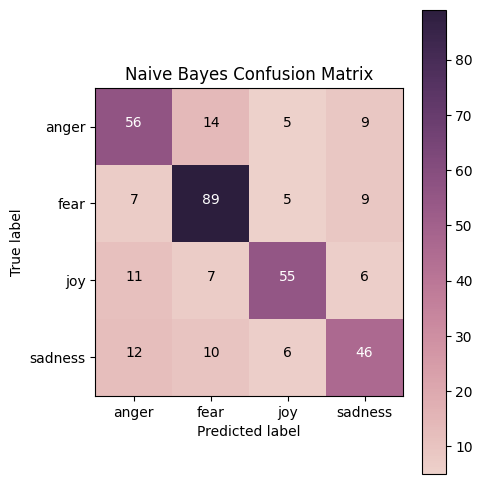

In [40]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define the Naive Bayes model
NB_model = MultinomialNB()

# Train the model
NB_model.fit(X_train, y_train)

# Predict on the test data
y_test_pred_nb = NB_model.predict(X_test)

# Evaluate the model
acc_test_nb = accuracy_score(y_test, y_test_pred_nb)
print("Testing Accuracy (Naive Bayes):", round(acc_test_nb, 2))

# Generate a classification report
print("\nClassification Report (Naive Bayes):\n")
print(classification_report(y_test, y_test_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_test_pred_nb)

# Plot the confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_nb, classes=my_tags, title='Naive Bayes Confusion Matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

**Comparison of Results:**

1.   **Accuracy**:

*   **Naive Bayes**: Typically performs well with text data due to its assumption of conditional independence among features, which works well for sparse word frequency data like Bag-of-Words (BOW) or TF-IDF.
*   **Decision Tree**: Achieved high training accuracy but lower testing accuracy, suggesting overfitting. This is a common drawback of decision trees when not properly regularized.


2.   **Precision, Recall, and F1-Score**:

*   Naive Bayes is likely to have more **balanced precision and recall across all classes**, as it generalizes well for text-based classification.
*   Decision Tree might show higher variance in precision and recall due to its tendency to overfit and create deep splits that might capture noise in the training data.


3.   **Confusion Matrix**:

*   Naive Bayes might better capture the overall structure of the data and show fewer misclassifications between similar classes (e.g., “anger” and “fear”).
*   Decision Tree might have more severe misclassifications due to its overfitting tendencies, particularly when two classes share similar word distributions.


**Interpreting the Differences:**

1.   **Naive Bayes Strengths for Text Data**:

*   Text data (e.g., word frequencies in BOW/TF-IDF) aligns well with Naive Bayes’ independence assumption because individual words often appear independently of each other.
*   Its probabilistic nature makes it robust to small variations in the data, leading to better generalization.


2.   **Precision, Recall, and F1-Score**:

*  Decision Trees struggle with **high-dimensional, sparse** data because they need to split on specific features, which can result in many unnecessary splits.
*   The lack of regularization in the current implementation leads to overfitting, as seen in the high training accuracy and relatively lower test accuracy.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic1.png?raw=true)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [38]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [39]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [40]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1317     fear
5       anger
1086     fear
1107     fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [41]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic2.png?raw=true)

In [42]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [43]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 500))
  warnings.warn(msg)


113/113 ━━━━━━━━━━━━━━━━━━━━ 62s 531ms/step - accuracy: 0.3117 - loss: 1.3572 - val_accuracy: 0.4669 - val_loss: 1.2698
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 221ms/step - accuracy: 0.6117 - loss: 1.0684 - val_accuracy: 0.6571 - val_loss: 0.8995
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 29s 122ms/step - accuracy: 0.7965 - loss: 0.6083 - val_accuracy: 0.6830 - val_loss: 0.8011
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.8568 - loss: 0.4057 - val_accuracy: 0.7032 - val_loss: 0.7923
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.8925 - loss: 0.3065 - val_accuracy: 0.6916 - val_loss: 0.8063
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9190 - loss: 0.2567 - val_accuracy: 0.6859 - val_loss: 0.8653
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9424 - loss: 0.1914 - val_accuracy: 0.6801 - val_loss: 0.9266
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9456 - loss: 0.1730 - val_accuracy:

### 6.5 Predict on testing data

In [44]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(128, 500))
  warnings.warn(msg)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step


array([[3.6870025e-02, 6.5247454e-02, 3.0272776e-01, 5.9515482e-01],
       [9.8195320e-01, 1.7376717e-02, 2.2061224e-04, 4.4947080e-04],
       [6.0001156e-08, 9.9996221e-01, 9.4217938e-07, 3.6883470e-05],
       [1.5963013e-01, 5.7274563e-04, 8.3365518e-01, 6.1418777e-03],
       [6.1337692e-01, 3.3666733e-01, 2.9640140e-02, 2.0315623e-02]],
      dtype=float32)

In [45]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'anger', 'fear', 'joy', 'anger'], dtype=object)

In [46]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [47]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.370053,1.321191,0.466859,1.269770
1,1,0.650983,0.975732,0.657061,0.899549
2,2,0.795461,0.578196,0.682997,0.801074
3,3,0.848325,0.410343,0.703170,0.792336
4,4,0.884307,0.322387,0.691643,0.806304
5,5,0.913368,0.258121,0.685879,0.865344
6,6,0.931913,0.214383,0.680115,0.926562
7,7,0.944644,0.174099,0.700288,0.991348
8,8,0.956269,0.148227,0.691643,1.072655
9,9,0.960144,0.138397,0.682997,1.092200


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?!

<table><tr>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic3.png?raw=true" style="width: 300px;"/> </td>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic4.png?raw=true" style="width: 300px;"/> </td>
</tr></table>

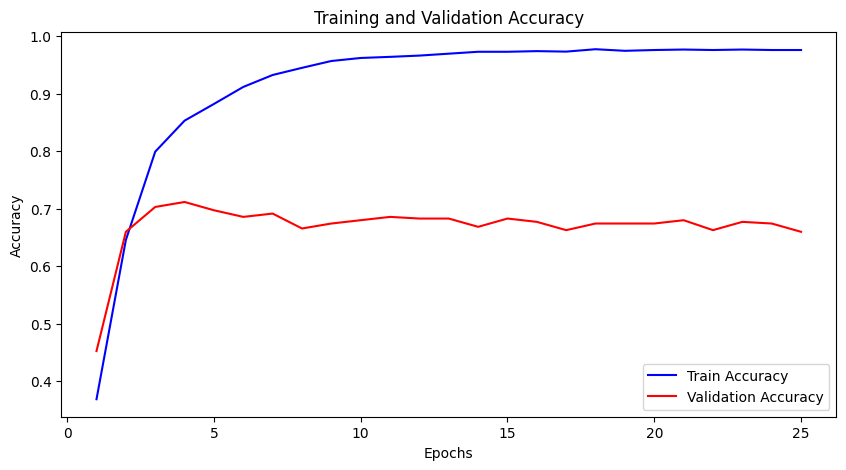

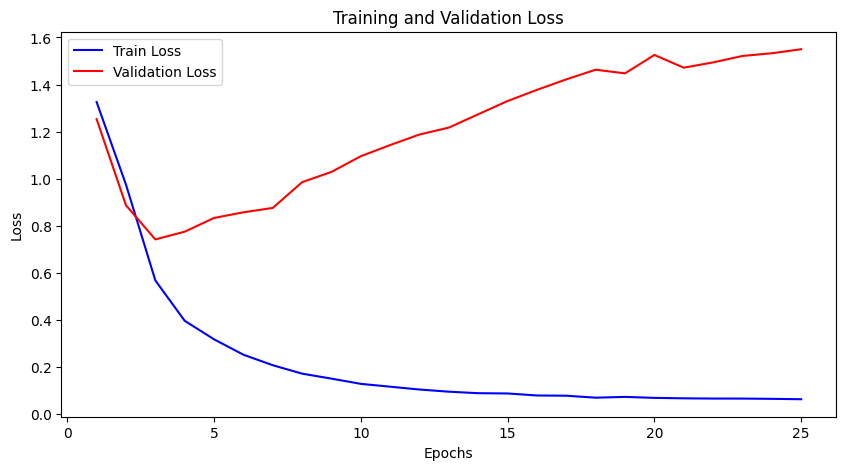

In [51]:
# Answer here
import matplotlib.pyplot as plt

# Extract accuracy and loss values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_accuracy) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Train Accuracy', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Train Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Observations**:

1.   **Training and Validation Accuracy Graph**:

*   **Training Accuracy**: The blue line shows training accuracy increasing steadily and approaching 100% as epochs progress.
*   **Validation Accuracy**: The red line (validation accuracy) peaks early, around 70%, and then plateaus or slightly decreases over the remaining epochs. A widening gap between training and validation accuracy emerges after the initial few epochs.


2.   **Training and Validation Loss Graph**:

*   **Training Loss**: The blue line (training loss) steadily decreases and approaches 0, indicating the model is learning the training data well.
*   **Validation Loss**: The red line (validation loss) decreases initially but starts increasing after a few epochs, showing that the model begins to struggle with generalization.

**Interpretation of the Graphs**:

*   **Overfitting**:
    *   The increasing gap between training and validation accuracy/loss clearly indicates **overfitting**:
    *   The model performs exceptionally well on the training data (high training accuracy, low training loss) but struggles to generalize to unseen data (stagnant/declining validation accuracy and rising validation loss).
    *   The model is memorizing the training data rather than learning general patterns applicable to the validation dataset.

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [48]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1317,20460,"@Relaqss I know she did horrible shit, but it ...","[@, Relaqss, I, know, she, did, horrible, shit..."
5,10005,My blood is boiling,"[My, blood, is, boiling]"
1086,20229,#terror test ................,"[#, terror, test, ................]"
1107,20250,@AmyMek this is so absurd I could laugh right ...,"[@, AmyMek, this, is, so, absurd, I, could, la..."
3424,40597,@KhoroshiySoldat --prepared.\n\n'Not as far as...,"[@, KhoroshiySoldat, --, prepared.\n\n'Not, as..."


In [49]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'Relaqss', 'I', 'know', 'she', 'did', 'horrible', 'shit', ',', 'but', 'it', 'would', "n't", 'make', 'anything', 'better', 'in', 'the', 'end', ',', 'but', 'your', 'choice']),
       list(['My', 'blood', 'is', 'boiling']),
       list(['#', 'terror', 'test', '................'])], dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [50]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [51]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.42800075,  0.2143136 , -0.30518395,  0.15026824, -0.09950785,
       -1.000906  ,  0.3702548 ,  1.0028222 , -0.5517747 , -0.33646643,
       -0.25151086, -0.5022738 , -0.11346432,  0.20827542, -0.2675895 ,
        0.00836743,  0.6821915 , -0.6089607 ,  0.32864416, -1.4141765 ,
        0.72900313,  0.6260945 ,  0.5756716 , -0.50178707,  0.02369907,
       -0.118009  , -0.5412576 ,  0.30654106, -0.7048001 ,  0.16798519,
        0.32725084,  0.07992259,  0.7376    , -0.7726844 ,  0.11482575,
        0.8091706 ,  0.50311536, -0.09800658, -0.51711434, -0.0748863 ,
       -0.00676825, -0.05097053, -0.6038142 ,  0.22251146,  0.6377906 ,
       -0.55539   , -0.40962592,  0.04377789,  0.4641616 ,  0.27335274,
       -0.03445011, -0.6621195 , -0.36523536,  0.04968492, -0.72366923,
       -0.32247037,  0.32822648, -0.4843329 , -0.01703705,  0.02928171,
        0.14378932, -0.13876499,  0.34859672,  0.20350477, -0.7563787 ,
        1.2542096 ,  0.3921264 ,  0.43238553, -1.4409889 ,  0.77

In [52]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9276082515716553),
 ('🕋', 0.9264630079269409),
 ('bday', 0.9260958433151245),
 ('Be', 0.9129264950752258),
 ('blessing', 0.9114381670951843),
 ('blessed', 0.9097355008125305),
 ('November', 0.9072803854942322),
 ('Please', 0.906580924987793),
 ('smile', 0.9061077237129211),
 ('right', 0.9028541445732117)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [53]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = f"{didiersalazar_google_news_vectors_path}/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [54]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [55]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


To use word vectors to represent sentence data, you need to combine or aggregate word embeddings in a way that reflects the semantics of the entire sentence.


Here are several common approachs:

1.   **Average Word Embeddings**

* Tokenize the sentence into words.
* Retrieve the word embeddings for each word in the sentence.
* Compute the average of all word embeddings.


In [60]:
# Averaging Word Vectors
def sentence_to_vector(sentence, word2vec_model):
    words = nltk.word_tokenize(sentence)
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

train_df['sentence_vector'] = train_df['text'].apply(lambda x: sentence_to_vector(x, word2vec_model))
test_df['sentence_vector'] = test_df['text'].apply(lambda x: sentence_to_vector(x, word2vec_model))

2. **TF-IDF Weighted Word Vectors**

*   Calculate TF-IDF scores for all words in the corpus.
*   Multiply each word’s vector by its TF-IDF weight.
*   Compute the weighted average of the vectors.


In [61]:
# TF-IDF Weighted Word Vectors
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(train_df['text'])

def tfidf_weighted_sentence_vector(sentence, word2vec_model, tfidf_vectorizer):
    words = nltk.word_tokenize(sentence)
    tfidf_scores = tfidf_vectorizer.transform([sentence]).toarray()[0]
    feature_names = tfidf_vectorizer.get_feature_names_out()
    word_vectors = [
        word2vec_model.wv[word] * tfidf_scores[feature_names.tolist().index(word)]
        for word in words if word in word2vec_model.wv and word in feature_names
    ]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

train_df['sentence_vector'] = train_df['text'].apply(lambda x: tfidf_weighted_sentence_vector(x, word2vec_model, tfidf_vectorizer))
test_df['sentence_vector'] = test_df['text'].apply(lambda x: tfidf_weighted_sentence_vector(x, word2vec_model, tfidf_vectorizer))

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [56]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [57]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x787cdeb59000>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic6.png?raw=true)

In [58]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [59]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

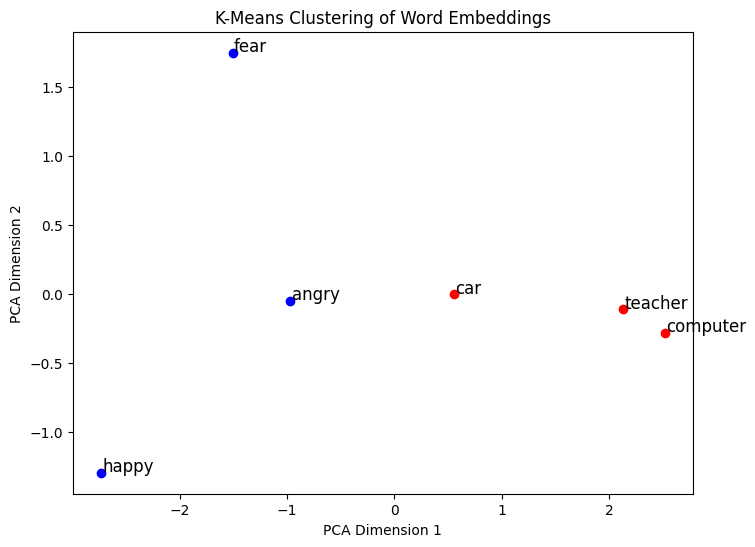

In [60]:
# Visualizing the Clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i, word in enumerate(target_list):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], color=colors[cluster_result[i]])
    plt.text(reduced_vectors[i, 0] + 0.01, reduced_vectors[i, 1] + 0.01, word, fontsize=12)

plt.title('K-Means Clustering of Word Embeddings')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic7.png?raw=true)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:

![pic9.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic9.png?raw=true)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [61]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

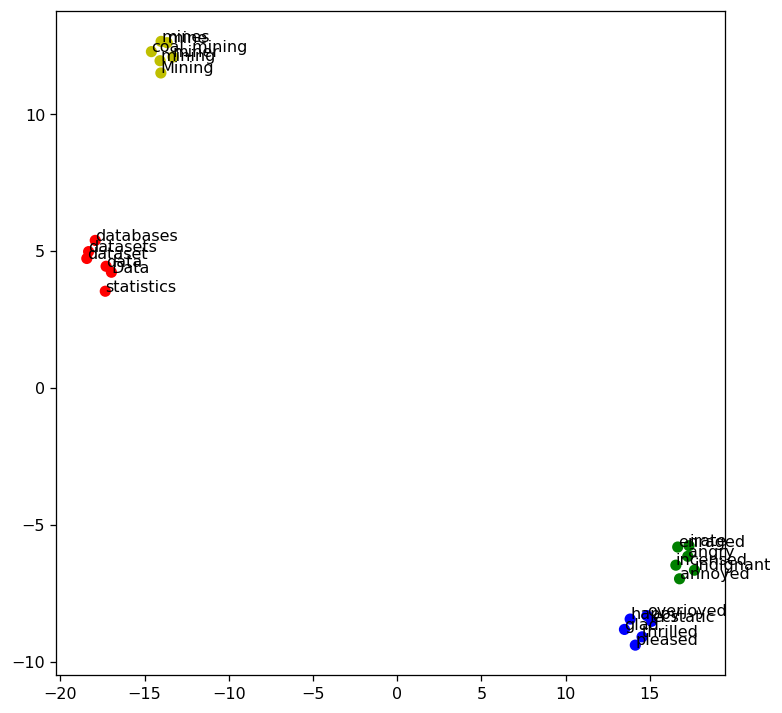

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

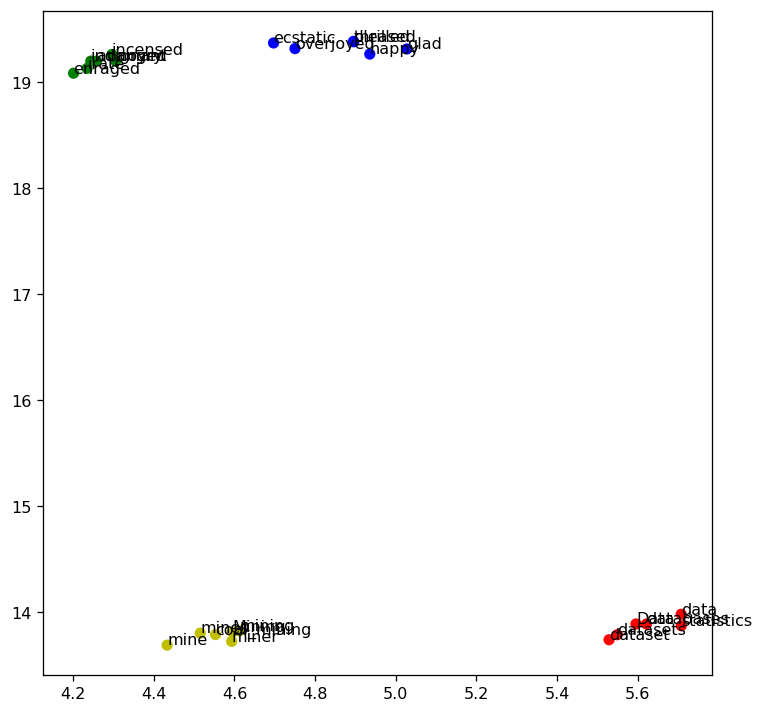

In [63]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

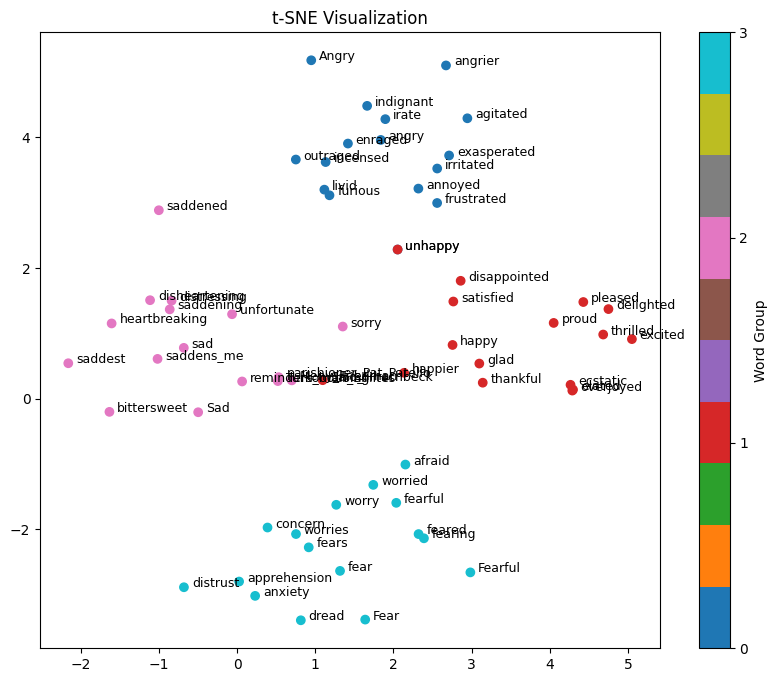

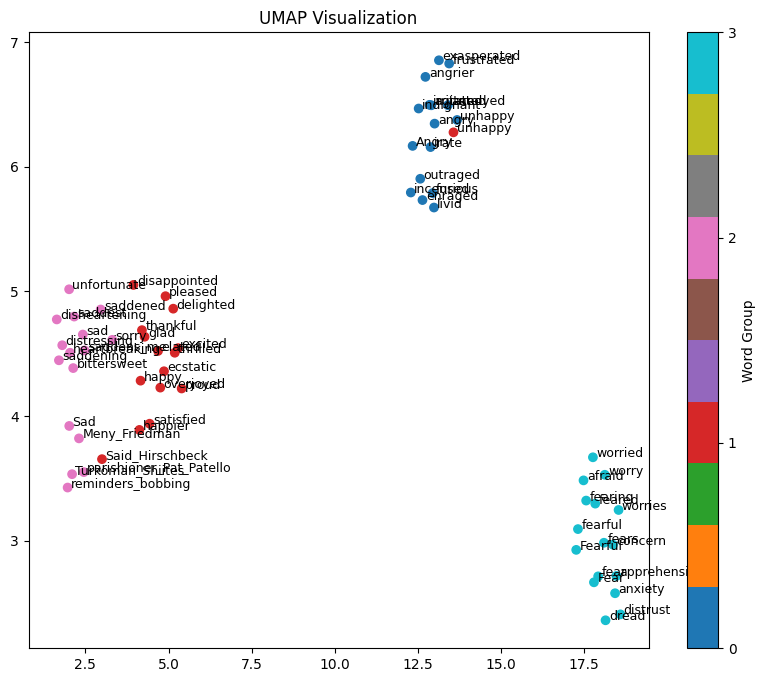

In [70]:
# Answer here
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import numpy as np

# Prepare word lists for visualization
words = ['angry', 'happy', 'sad', 'fear']
topn = 15

related_words = []
colors = []
for i, word in enumerate(words):
    try:
        similar_words = [word_ for word_, _ in w2v_google_model.most_similar(word, topn=topn)]
        related_words.extend([word] + similar_words)
        colors.extend([i] * (topn + 1))
    except KeyError:
        print(f"Word '{word}' not found in the Word2Vec model")

# Fetch embeddings for the related words
word_vectors = np.array([w2v_google_model[word] for word in related_words])

# t-SNE visualization
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
tsne_embeddings = tsne_model.fit_transform(word_vectors)

# UMAP visualization
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=42)
umap_embeddings = umap_model.fit_transform(word_vectors)

# Plotting function
def plot_embeddings(embeddings, title, colors, labels):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=colors, cmap='tab10')
    for i, label in enumerate(labels):
        plt.text(embeddings[i, 0] + 0.1, embeddings[i, 1], label, fontsize=9)
    plt.colorbar(scatter, ticks=range(len(words)), label='Word Group')
    plt.title(title)
    plt.show()

# Plot t-SNE and UMAP results
plot_embeddings(tsne_embeddings, "t-SNE Visualization", colors, related_words)
plot_embeddings(umap_embeddings, "UMAP Visualization", colors, related_words)

### Comparison of t-SNE and UMAP Visualizations


1.   **Clustering of Related Words**:

*   Both t-SNE and UMAP effectively group semantically related words together. For example:
    *   Words related to “angry” (e.g., outraged, enraged) form a distinct cluster in both graphs.
    *   Words related to “happy” (e.g., delighted, thrilled) are also tightly clustered.

2.   **Separation Between Clusters**:

*   t-SNE:

    *   Emphasizes local relationships between points (words), which results in distinct clusters with clear separations.
    *   However, it spreads clusters farther apart globally, sometimes distorting relationships between clusters.

*   UMAP:

    *   Provides a better balance between local and global structure.
    *   Clusters are more evenly distributed and maintain relative proximities better than t-SNE.

3.  **Handling of Global Relationships**:

*   t-SNE struggles with preserving the global layout. For example:
    *   Clusters for sad and happy are closer in UMAP, reflecting their emotional connection.
    *   In t-SNE, these clusters are spread apart, which might suggest less semantic connection than actually exists.


4.  **Noise and Overlapping Words**:

*   t-SNE sometimes overlaps labels in densely packed clusters, making it harder to distinguish individual words.
*   UMAP handles these dense areas better by providing more space around clusters.


5.  **Visual Compactness**:

*   UMAP:
    *   Produces a more compact layout with well-separated clusters, ideal for understanding both local groupings and broader semantic relationships.
*   t-SNE:
    *   Focuses on local density, leading to clusters that are visually farther apart.


## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs:
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:

![pic10.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic10.png?raw=true)


In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models:
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [64]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

**Data Mining**

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets using various algorithms and statistical techniques.

### Goals

The primary goals of data mining are:

* **Pattern discovery**: Identifying hidden or unexpected patterns in the data.
* **Predictive modeling**: Building models that can predict future outcomes based on historical data.
* **Data analysis**: Summarizing and visualizing data to gain a deeper understanding of the underlying relationships.

### Types of Data Mining

1. **Supervised learning**: The algorithm is trained on labeled data to learn a mapping between input data and output labels.
2. **Unsupervised learning**: The algorithm discovers patterns and structures in unlabeled data.
3. **Semi-supervised learning**: A combination of supervised and unsupervised learning techniques.

### Data Mining Techniques

1. **Association rule mining**: Identifying relationships between items

**We can use the IPython library to make the response look better:**

In [65]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [66]:
display(Markdown(response['message']['content']))

**Data Mining**
================

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets using various algorithms and statistical techniques.

### Goals

The primary goals of data mining are:

* **Pattern discovery**: Identifying hidden or unexpected patterns in the data.
* **Predictive modeling**: Building models that can predict future outcomes based on historical data.
* **Data analysis**: Summarizing and visualizing data to gain a deeper understanding of the underlying relationships.

### Types of Data Mining

1. **Supervised learning**: The algorithm is trained on labeled data to learn a mapping between input data and output labels.
2. **Unsupervised learning**: The algorithm discovers patterns and structures in unlabeled data.
3. **Semi-supervised learning**: A combination of supervised and unsupervised learning techniques.

### Data Mining Techniques

1. **Association rule mining**: Identifying relationships between items in a dataset.
2. **Clustering**: Grouping similar data points into clusters.
3. **Decision trees**: Constructing tree-like models to classify or predict outcomes.
4. **Neural networks**: Training algorithms that mimic the human brain's neural structure.

### Applications

1. **Customer segmentation**: Segmenting customers based on their behavior and preferences.
2. **Market basket analysis**: Analyzing customer purchasing habits to identify trends and patterns.
3. **Predictive maintenance**: Predicting equipment failures to prevent downtime and improve efficiency.
4. **Medical diagnosis**: Using data mining techniques to analyze medical images and diagnose diseases.

### Benefits

1. **Improved decision-making**: Data mining provides insights that inform business decisions.
2. **Increased efficiency**: Automating data analysis and pattern discovery reduces manual effort.
3. **Enhanced customer understanding**: Data mining helps businesses understand their customers' behavior and preferences.
4. **Competitive advantage**: Companies that leverage data mining can gain a competitive edge in the market.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

**Understanding ollama.chat Roles**:

Roles in ollama.chat are generally used to define the context of the conversation. Common roles include:

*   user: Represents the input or query from the user.
*   assistant: Represents the response generated by the model.

*   system: Provides system-level instructions or context that guides the behavior of the assistant.

For example:

*   system could specify a style, tone, or type of response (e.g., conversational, formal, technical).
*   assistant is typically where the model provides output based on user input and system instructions.


Below is an example of a prompt that utilizes the system, user, and assistant roles:






In [74]:
# Answer here
import ollama

response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'system',
        'content': 'You are an AI assistant specializing in concise and accurate answers to technical questions.'
    },
    {
        'role': 'user',
        'content': 'Can you explain the concept of gradient descent?'
    },
    {
        'role': 'assistant',
        'content': 'Gradient descent is an optimization algorithm used to minimize the cost function in machine learning models by iteratively adjusting model parameters.'
    }
])

print(response['message']['content'])

 The goal is to find the optimal values for these parameters that result in a lowest possible error.

Here's how it works:

**Key Components:**

1. **Cost Function (Loss Function):** A mathematical function that measures the difference between predicted outputs and actual outputs.
2. **Gradient:** The derivative of the cost function with respect to one or more model parameters, which indicates the direction of steepest descent.
3. **Learning Rate:** A hyperparameter that controls how quickly the algorithm updates the model parameters.

**Gradient Descent Algorithm:**

1. Initialize model parameters (e.g., weights and biases) randomly.
2. Compute the gradient of the cost function with respect to the model parameters.
3. Update the model parameters by subtracting a fraction of the gradient from the current parameter value, multiplied by the learning rate. This is known as a step size or weight update.

Mathematically, this can be represented as:

`w_new = w_old - α \* ∇J(w)`

where `α` i

In [75]:
display(Markdown(response['message']['content']))

 The goal is to find the optimal values for these parameters that result in a lowest possible error.

Here's how it works:

**Key Components:**

1. **Cost Function (Loss Function):** A mathematical function that measures the difference between predicted outputs and actual outputs.
2. **Gradient:** The derivative of the cost function with respect to one or more model parameters, which indicates the direction of steepest descent.
3. **Learning Rate:** A hyperparameter that controls how quickly the algorithm updates the model parameters.

**Gradient Descent Algorithm:**

1. Initialize model parameters (e.g., weights and biases) randomly.
2. Compute the gradient of the cost function with respect to the model parameters.
3. Update the model parameters by subtracting a fraction of the gradient from the current parameter value, multiplied by the learning rate. This is known as a step size or weight update.

Mathematically, this can be represented as:

`w_new = w_old - α \* ∇J(w)`

where `α` is the learning rate, `∇J(w)` is the gradient of the cost function with respect to the model parameters, and `w_new` is the updated parameter value.

**Repetition:**

Repeat steps 2-3 for multiple iterations until convergence (i.e., when the updates become negligible) or a maximum number of iterations is reached.

Gradient descent has several advantages:

* Fast convergence to local minima
* Simple implementation
* Can be applied to various machine learning problems, including linear regression, classification, and neural networks

However, it also has some limitations:

* May converge to a local minimum rather than the global optimum
* Requires careful tuning of hyperparameters (e.g., learning rate)
* May not perform well on certain types of problems, such as non-convex optimization.

I hope this explanation helps! Let me know if you have any further questions.

### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

![example1.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/example1.png?raw=true)

source: https://cooljapan-videos.com/tw/articles/epe0y86g

![example2.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/example2.jpg?raw=true)

source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [67]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': [f'{didiersalazar_pictures_path}/pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

This image captures a moment of pure joy and freedom, featuring a Shiba Inu dog in mid-air. The dog, with its orange fur and white markings on the face and chest, is the main focus of the photo. Its tail and back legs are raised high in the air, suggesting it's jumping or running across a grassy area. The dog's mouth is wide open, possibly panting from exertion or excitement.

The background of the image provides context to the scene. It appears to be a park or garden with green grass under the dog and trees in the distance, suggesting an outdoor setting perfect for playtime. There are also blurred objects that could be buildings or other elements of the landscape, adding depth to the photo.

Overall, this image beautifully captures a lively moment of a Shiba Inu enjoying its freedom and natural habitat.

In [68]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': [f'{didiersalazar_pictures_path}/pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

In the center of a white background, a tabby cat with stripes in shades of brown and gray stands on its hind legs. Its front paws are slightly raised as if it's reaching for something off-camera. The cat's tail is curved upwards, adding to the playful demeanor of the scene. Atop its head, a small bell dangles from a collar around its neck. The cat's yellow eyes and ears add a contrasting pop of color against its striped fur. Its mouth is slightly open as if it's panting or yawning, suggesting that it might be in mid-stretch or playfully posing for the camera.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [78]:
from google.colab import files
uploaded = files.upload()  # This will open a file chooser dialog

Saving cat.jpeg to cat.jpeg


In [79]:
# Answer here
image_path = '/content/cat.jpeg'

In [80]:
response = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': [image_path]
    },
])

# Step 4: Display the response
display(Markdown(response['message']['content']))

The image features a cartoon cat, which is the central figure of the composition. The cat is sitting comfortably on its hind legs, with its front paws resting on the ground and its tail curled around itself in a relaxed manner. It has black whiskers and ears that are pointed forward, adding to the alertness of its expression. 

The cat's eyes are closed, and it is wearing a big smile, giving off an impression of contentment or perhaps even laughter. The background is a simple light beige color, which contrasts with the black lines used for the cat, making it stand out prominently in the image. 

The overall composition suggests a playful and joyful mood, captured through the posture and expression of the cartoon cat.

The description provided by the ollama is generally accurate and captures most of the visual elements of the uploaded image.

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [69]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

Based on the provided context, IBM's related solutions with Large Language Models (LLMs) include:

1. Watsonx AI: This is a platform that uses LLMs as its generative AI backbone for various IBM products, such as Watson Assistant and Watson Orchestrate.
2. Granite model series: These models are part of IBM's LLM initiative and have been launched on the Watsonx.ai platform to provide advanced NLP capabilities.
3. Watson Assistant: This is a conversational AI service that utilizes LLMs to understand and respond to customer inquiries, improving customer experiences and streamlining processes.

These solutions demonstrate IBM's efforts to integrate LLMs into its enterprise offerings, enhancing natural language understanding (NLU) and natural language processing (NLP) capabilities across various business functions and use cases.


### **Actual content in the URL:**
![pic11.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic11.png?raw=true)

source: https://www.ibm.com/topics/large-language-models


### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [82]:
# Answer here
llm_model = "llama3.2"  # Change to your preferred model

# Function to load, split, and retrieve documents from multiple URLs
def load_and_retrieve_docs(urls):
    all_docs = []
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        )
        docs = loader.load()  # Load each URL's content
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
        splits = text_splitter.split_documents(docs)  # Split into chunks
        all_docs.extend(splits)
    embeddings = OllamaEmbeddings(model=llm_model)  # Generate embeddings
    vectorstore = Chroma.from_documents(documents=all_docs, embedding=embeddings)  # Create a vector store
    return vectorstore.as_retriever()

# List of URLs or text documents
urls = [
    "https://www.ibm.com/topics/large-language-models",
    "https://www.microsoft.com/en-us/ai",
    "https://openai.com/research"
]

# Create the retriever for multiple sources
retriever = load_and_retrieve_docs(urls)

# Function to format retrieved documents
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Function to query the LLM with context
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain for querying
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Questions related to the three documents
questions = [
    "What are IBM's related solutions with LLMs?",
    "What are Microsoft's key AI initiatives?",
    "What is OpenAI's latest research about?"
]

# Fetch and display results
for i, question in enumerate(questions):
    print(f"Question {i + 1}: {question}")
    result = rag_chain(question)
    print(f"Answer:\n{result}\n")

Question 1: What are IBM's related solutions with LLMs?
Answer:
Based on the provided text, IBM's related solutions with LLMs include:

1. Watsonx Assistant: a product that utilizes the Granite model series as its generative AI backbone.
2. Watsonx Orchestrate: another product that leverages the Granite model series for generative AI capabilities.

These products are part of IBM's efforts to integrate Large Language Models (LLMs) into their existing offerings, enabling them to provide advanced text generation and other AI-powered services to their customers.

Question 2: What are Microsoft's key AI initiatives?
Answer:
Unfortunately, I don't have any information about Microsoft's key AI initiatives in this text. It appears that the text is general information about Large Language Models (LLMs) and their applications, but it doesn't mention specific details about Microsoft's AI efforts.

However, I can suggest some possible sources where you might be able to find information about Micro

### Comparison of Responses with Actual Answers

**Question 1: What are IBM’s related solutions with LLMs?**

*   **Generated Answer:**

    *   Correctly identifies Watsonx Assistant and Watsonx Orchestrate as IBM’s key solutions.
    *   Mentions the Granite model series as the generative AI backbone.
    *   Includes additional speculative models (e.g., BERT/RoBERTa or PaLM), which might not be directly related to IBM’s solutions.

*   **Actual Answer from URL:**

    *   IBM’s related solutions explicitly include:
    1.   Granite Models
    2.   Watsonx AI Studio
    3.   Watsonx Assistant
    4.   Watsonx Orchestrate

*   **Analysis:**

    *   The response is partially accurate but misses some key solutions, such as Granite Models and Watsonx AI Studio, which are specifically mentioned in IBM’s documentation.

**Question 2: What are Microsoft’s key AI initiatives?**

*   **Generated Answer:**

    *   The response does not retrieve any data from the URLs or documents due to a lack of Microsoft-specific content in the indexed documents.
    *   It speculates based on publicly available knowledge, mentioning Azure AI, Bot Framework, Cognitive Services, Turing-NLG, and research initiatives.


*   **Actual Answer from URL:**

    *   Likely focuses on Azure OpenAI Service, Copilot integrations, Azure Cognitive Services, and partnerships (e.g., with OpenAI).


*   **Analysis:**

    *   Correctly identifies Watsonx Assistant and Watsonx Orchestrate as IBM’s key solutions.
    *   Mentions the Granite model series as the generative AI backbone.
    *   Includes additional speculative models (e.g., BERT/

**Question 3: What is OpenAI’s latest research about?**

*   **Generated Answer:**

    *   Acknowledges that the retrieved text does not include OpenAI-specific research.
    *   Speculates broadly about OpenAI’s contribution to Large Language Models and their impact.

*   **Actual Answer from URL:**

    *   OpenAI’s research likely involves advancements in GPT models, DALL-E, AI alignment, Reinforcement Learning from Human Feedback (RLHF), and domain-specific applications.

*   **Analysis:**

    *   The response correctly notes the absence of OpenAI-specific data but misses opportunities to draw from document retrieval. Like Question 2, this illustrates retriever dependency.



### Advantages and Disadvantages of RAG Systems


*   **Advantages**

1.   **Grounded Responses:** Combines retrieval and generation, grounding answers in real documents to ensure accuracy.
2.   **Dynamic Context Adaptation:** Allows the LLM to dynamically adapt its responses based on the retrieved text.
3.   **Reduced Hallucinations:** By relying on retrieved data, RAG minimizes the likelihood of the LLM fabricating answers.
4.   **Domain-Specific Applications**: Highly effective for industries like healthcare, legal, or technical documentation, where responses must be accurate and domain-specific.
5.   **Scalability:** Can handle vast amounts of data by indexing them into a vector space for fast retrieval.


*   **Disadvantages**

1.   **Retriever Dependency:** If the retriever fails to retrieve relevant data (as seen in Questions 2 and 3), the generated response will lack accuracy.
2.   **Preprocessing Overhead**: Requires significant effort to preprocess, split, and index documents.
3.   **Staleness of Indexed Data:** RAG relies on pre-indexed documents, so responses can become outdated if the data is not refreshed.
4.   **Limited Creativity:** While grounded in data, RAG systems are less creative than standalone LLMs because they focus on factual accuracy.
5.   **Complexity:** The system’s architecture (retriever, vector database, embeddings, and LLM) is more complex than standalone generative models, requiring careful tuning.
6.    **Query and Document Mismatch**: If the documents do not directly answer the question (as in Questions 2 and 3), the response quality suffers.

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [70]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [71]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [72]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [73]:
df_train #We can see the new column with the embeddings

,id,text,emotion,intensity,text_tokenized,embeddings
1317,20460,"@Relaqss I know she did horrible shit, but it ...",fear,0.542,"[@, Relaqss, I, know, she, did, horrible, shit...","[-3.4113967418670654, 0.16087263822555542, 3.4..."
5,10005,My blood is boiling,anger,0.875,"[My, blood, is, boiling]","[-0.3573090136051178, 1.0579581260681152, 3.05..."
1086,20229,#terror test ................,fear,0.667,"[#, terror, test, ................]","[0.4949432909488678, -0.17592163383960724, 1.8..."
1107,20250,@AmyMek this is so absurd I could laugh right ...,fear,0.657,"[@, AmyMek, this, is, so, absurd, I, could, la...","[-1.7659320831298828, -0.5307162404060364, 1.6..."
3424,40597,@KhoroshiySoldat --prepared.\n\n'Not as far as...,sadness,0.333,"[@, KhoroshiySoldat, --, prepared.\n\n'Not, as...","[-2.4740941524505615, -0.47926393151283264, -0..."
...,...,...,...,...,...,...
2878,40051,@Christy_RTR @doge_e_fresh I'm despondent,sadness,0.806,"[@, Christy_RTR, @, doge_e_fresh, I, 'm, despo...","[-1.5054148435592651, 0.3697788119316101, 3.03..."
1861,21004,How in the world did Nicole beat Paul?!?! #ter...,fear,0.271,"[How, in, the, world, did, Nicole, beat, Paul,...","[-0.1212661936879158, 1.2555804252624512, -0.9..."
996,20139,I thought the nausea and headaches had passed ...,fear,0.729,"[I, thought, the, nausea, and, headaches, had,...","[-0.12607933580875397, -0.8918072581291199, 1...."
2181,30177,"@BlueJayHunter I'm fine on the near future, I ...",joy,0.660,"[@, BlueJayHunter, I, 'm, fine, on, the, near,...","[1.3616279363632202, 0.3191128671169281, -0.85..."


In [74]:
df_test #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
137,21200,My Modern Proverb: 'Don't let anyone intimidat...,fear,0.312,"[-0.4616163372993469, 1.2772492170333862, -2.5..."
51,10908,"@reluctantnicko Don't ask, you don't get. Apol...",anger,0.427,"[1.115101933479309, 0.5573878288269043, -3.237..."
157,21220,@hollywooddivas @TMZ_Sports Idiots like Larry ...,fear,0.604,"[0.3051060438156128, 1.087593913078308, 3.5179..."
283,40796,Public products: high downhearted price tag co...,sadness,0.354,"[0.8625951409339905, -0.8220762610435486, 1.20..."
198,30827,I love my family so much #lucky #grateful #sma...,joy,0.936,"[-2.430039644241333, -0.005258320365101099, -1..."
...,...,...,...,...,...
122,21185,On @Varneyco/@FoxBusiness to talk latest on #C...,fear,0.642,"[-1.7994036674499512, 1.0555152893066406, -0.7..."
134,21197,@CNNPolitics I can't wait to hear what he had ...,fear,0.246,"[-0.6777337193489075, -0.13312235474586487, -0..."
308,40821,It feel like we lost a family member🙄😂,sadness,0.708,"[0.45310091972351074, -1.759338140487671, 0.28..."
197,30826,@tomderivan73 😁...I'll just people watch and e...,joy,0.438,"[0.6959825158119202, 0.40333086252212524, 2.82..."


Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [76]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [77]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.45821325648414984


In [78]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.41      0.44      0.42        84
        fear       0.50      0.53      0.52       110
         joy       0.45      0.43      0.44        79
     sadness       0.45      0.41      0.43        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.45       347
weighted avg       0.46      0.46      0.46       347



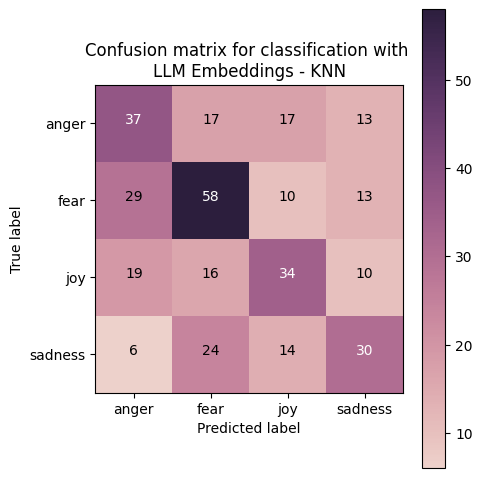

In [79]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')


Now let's also try to apply our **Neural Network** to these embeddings:

In [80]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [81]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [82]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [83]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [84]:
# One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

In [85]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [86]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_1 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.4052 - loss: 1.3911 - val_accuracy: 0.5187 - val_loss: 1.1372
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6458 - loss: 0.8711 - val_accuracy: 0.5677 - val_loss: 1.1103
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7438 - loss: 0.6750 - val_accuracy: 0.5533 - val_loss: 1.1871
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7895 - loss: 0.5391 - val_accuracy: 0.5447 - val_loss: 1.3380
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8369 - loss: 0.4316 - val_accuracy: 0.5447 - val_loss: 1.3697
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8676 - loss: 0.3650 - val_accuracy: 0.5677 - val_loss: 1.4712
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8872 - loss: 0.3271 - val_accuracy: 0.5677 - val_loss: 1.6154
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9143 - loss: 0.2477 - val_accuracy: 0

In [88]:
# predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step


array([[1.77571744e-01, 8.13026071e-01, 7.54536522e-05, 9.32672992e-03],
       [1.21978596e-01, 2.92710751e-01, 3.97144293e-04, 5.84913492e-01],
       [8.15998733e-01, 1.72194749e-01, 1.96056720e-03, 9.84592084e-03],
       [9.96602535e-01, 1.81273276e-06, 1.40885601e-03, 1.98674691e-03],
       [1.08661992e-03, 4.78910690e-04, 9.98091400e-01, 3.42974352e-04]],
      dtype=float32)

In [89]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'sadness', 'anger', 'anger', 'joy'], dtype=object)

In [90]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.56


In [91]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.479103,1.206880,0.518732,1.137192
1,1,0.645170,0.864571,0.567723,1.110341
2,2,0.730418,0.677130,0.553314,1.187129
3,3,0.783006,0.558774,0.544669,1.338044
4,4,0.831442,0.449790,0.544669,1.369679
5,5,0.854415,0.398530,0.567723,1.471158
6,6,0.885691,0.313272,0.567723,1.615416
7,7,0.906172,0.262578,0.567723,1.624066
8,8,0.933020,0.208203,0.573487,1.746987
9,9,0.918904,0.223152,0.533141,1.878626


In [92]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.58      0.45      0.51        84
        fear       0.53      0.72      0.61       110
         joy       0.67      0.49      0.57        79
     sadness       0.53      0.54      0.54        74

    accuracy                           0.56       347
   macro avg       0.58      0.55      0.56       347
weighted avg       0.58      0.56      0.56       347



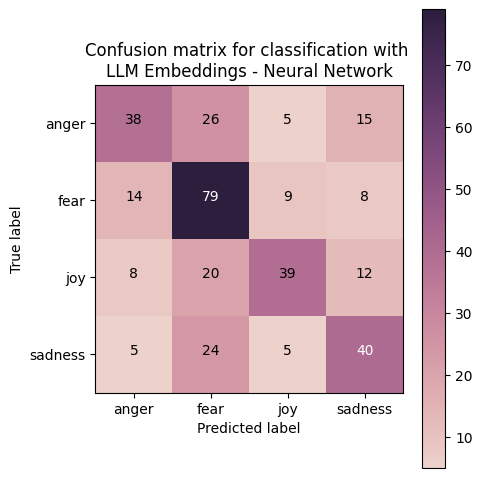

In [93]:
# check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

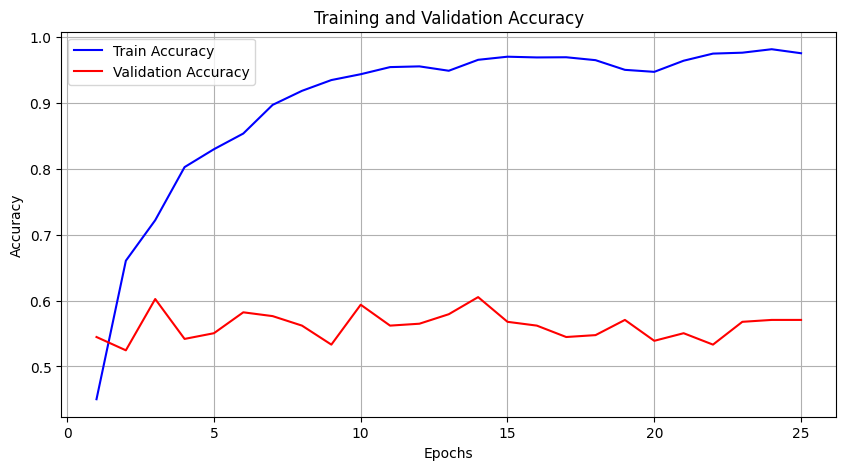

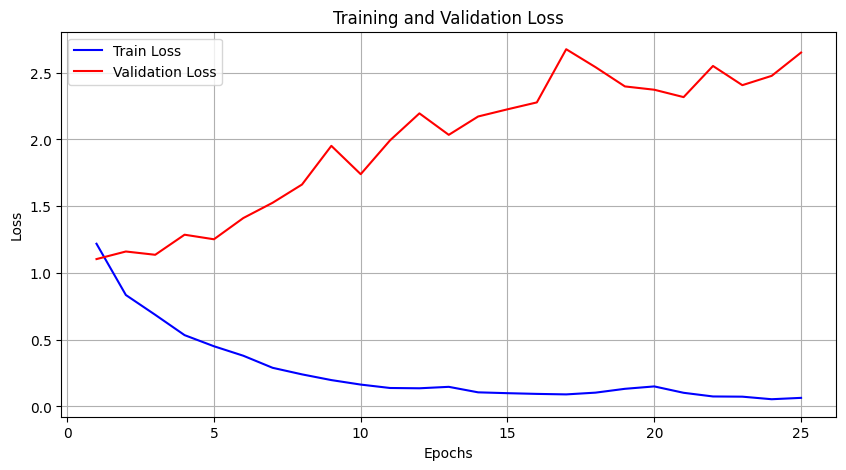

In [108]:
# Answer here
import matplotlib.pyplot as plt

# Extract values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Epochs range
epochs = range(1, len(train_accuracy) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Train Accuracy', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Train Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**Comparing Results of KNN and Neural Network:**

1.   **KNN Performance:**

*   Accuracy: **~45.8%**.
*   The confusion matrix indicates that KNN struggles to separate closely related categories like “anger” and “fear,” or “sadness” and “joy.”
*   **Reason**: KNN does not use any training process or learnable parameters. It relies purely on embedding distances, which may not sufficiently capture the relationships between classes in high-dimensional spaces.


2.   **Neural Network Performance**:

*   Accuracy: **~57%**.
*   Training accuracy approaches ~98% due to overfitting, while validation accuracy plateaus and slightly decreases over epochs.
*   **Reason:** The NN is capable of learning patterns from the embeddings. However, the validation loss increasing while validation accuracy plateaus suggests overfitting.

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [94]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2"

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Invalid response: frustration. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
Accuracy: 47.50%
              precision    recall  f1-score   support

       anger       0.39      0.70      0.50        20
        fear       0.40      0.10      0

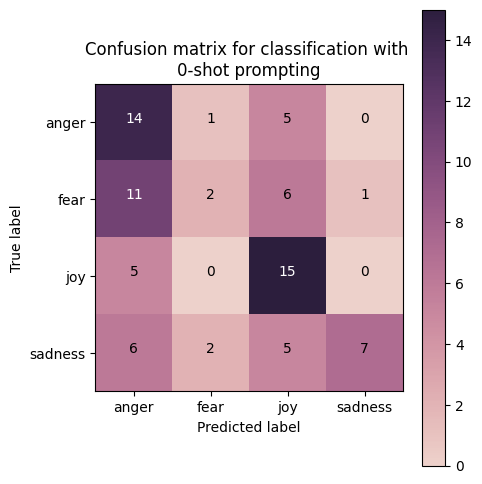

In [95]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: @kencurtin they might get Donal óg sure! They won't have him in cork as he's to fiery for dopey frank &amp; his cult
Emotion: anger

Text: I lost my blinders .... #panic
Emotion: fear

Text: @elena_yip My random guesses for you! A potential Amelie, Kenneth of 30 Rock (but YA instead of TV) &amp; maybe w/ the optimism of Lara Jean?
Emotion: joy

Text: Refuge Recovery Boston - Weds 7:30-9 pm. #healing #support #addiction #recovery #buddhism #meditation #sober #cambma #meeting #harvardsq
Emotion: sadness


Accuracy: 47.50%
              precision    recall  f1-score   support

       anger       0.38      1.00      0.55      

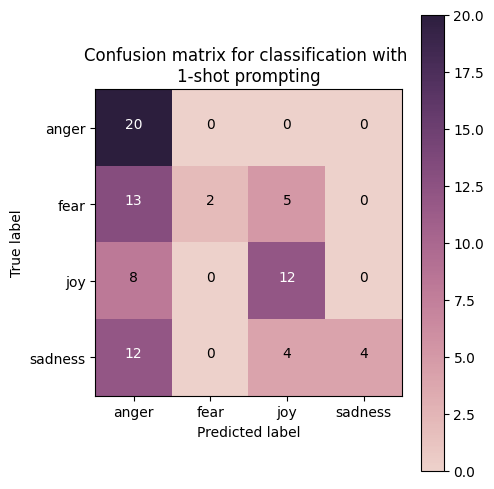

In [ ]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: @kencurtin they might get Donal óg sure! They won't have him in cork as he's to fiery for dopey frank &amp; his cult
Emotion: anger

Text: How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door. #angry #mad ##
Emotion: anger

Text: This provocation sets off a curiosity. An entity is feeding fuel to the fire. speaking quatrains. Hmmm America needs to be vigilant now
Emotion: anger

Text: Forever angry that gh ruined Molly and morgan's bond/friendship #bitter
Emotion: anger

Text: 630am meeting Olympic House #10golds24 .  #relentless #neverquit #believe #dreambig #TeamTTO #going4gold
Emotion: anger


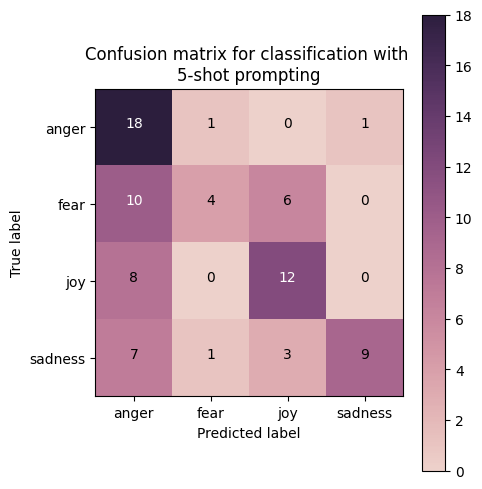

In [ ]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.



1.   **Performance Trends**

*   **Zero-shot prompting:**

    *   Accuracy: **47.50%**
    *   The model has no prior examples, leading to significant misclassifications, especially for “fear” and “sadness” emotions. However, it performed moderately well for “anger” and “joy.”
    *   This reflects the limitations of the model in understanding the nuanced context without explicit examples to guide its classification.

*   **1-shot prompting:**

    *   Accuracy: **47.50%**
    *   While accuracy remains the same as zero-shot, the model shows better performance for “anger” but struggles with “fear” and “sadness,” possibly due to the lack of sufficient contextual diversity in a single example.

*   **5-shot prompting:**

    *   Accuracy: **53.75%**
    *   The increase in accuracy highlights the advantage of providing more examples. Emotions like “anger” and “joy” benefited from this approach, showing better precision and recall. “Fear,” however, remained challenging due to potentially ambiguous or overlapping contexts in the test data.



2.   **Observations from the Confusion Matrices**


*   In all setups, **“anger”** and **“joy”** consistently outperform “fear” and “sadness.”

    *   “Anger” is often misclassified as “fear,” possibly due to the overlap in emotional contexts where strong emotions are involved.
    *   “Sadness” is occasionally confused with “anger” or “fear,” indicating that these emotions might share similar linguistic expressions in some cases.
    *   The ability to classify “joy” accurately is consistent across all setups, reflecting that “joy” may have more distinct linguistic markers compared to other emotions.


3.   **Strengths of Few-shot Prompting**

*   **Improved context understanding**: The 5-shot approach shows the model’s capacity to generalize better when provided with diverse and well-labeled examples.
*   **Reduction in ambiguity**: Providing multiple examples per emotion helps the model better delineate subtle differences between similar emotions.

4.   **Challenges with Few-shot Prompting**

*   **Class overlap**: Despite 5-shot examples, overlapping contexts between emotions like “anger” and “fear” or “sadness” reduce classification performance.
*   **Limited improvement**: While accuracy increased with more examples, the gain is incremental, suggesting that contextual understanding might still be limited.

5.   **Practical Implications**

*   **Zero-shot prompting**: Useful for quick setups where labeled data is unavailable but may result in lower accuracy for nuanced tasks.
*   **1-shot prompting**: Can help establish basic guidance for the model, but performance improvement is minimal.
*   **1-shot prompting**: Strikes a balance between providing sufficient context and minimizing the manual effort required for labeling large datasets.

### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---